In [143]:
import pandas as pd

# Load the dataset we just created
df = pd.read_csv("hr_salary_raw_200k.csv")

# Quick look at the first few rows
print(df.head())

# Info about columns
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())




               Name  Age  YearsExperience  CurrentSalaryINR  \
0       Imran Gupta   40               17           2553200   
1      Kiara Khanna   33               14           2115100   
2    Olivia Rastogi   31                4            811800   
3  Benjamin Chauhan   25                0            266300   
4    Kabir Banerjee   37                9           1499600   

   ExpectedSwitchSalaryINR  
0                  2969100  
1                  2901100  
2                   980400  
3                   376500  
4                  1791800  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Name                     200000 non-null  object
 1   Age                      200000 non-null  int64 
 2   YearsExperience          200000 non-null  int64 
 3   CurrentSalaryINR         200000 non-null  int64 
 4   Expected

In [144]:
# Step 1: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Name                       0
Age                        0
YearsExperience            0
CurrentSalaryINR           0
ExpectedSwitchSalaryINR    0
dtype: int64


In [145]:
# Step 2: Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [146]:
# Step 3: Summary statistics
print("Summary of numerical columns:")
print(df.describe())


Summary of numerical columns:
                 Age  YearsExperience  CurrentSalaryINR  \
count  200000.000000    200000.000000      2.000000e+05   
mean       33.829015         9.847670      1.589227e+06   
std         9.365963         8.621384      1.154750e+06   
min        18.000000         0.000000      2.456000e+05   
25%        27.000000         3.000000      6.637000e+05   
50%        32.000000         7.000000      1.239100e+06   
75%        39.000000        15.000000      2.272100e+06   
max        60.000000        35.000000      4.990800e+06   

       ExpectedSwitchSalaryINR  
count             2.000000e+05  
mean              1.944850e+06  
std               1.338245e+06  
min               2.726000e+05  
25%               8.633000e+05  
50%               1.638500e+06  
75%               2.724100e+06  
max               6.676900e+06  


In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")


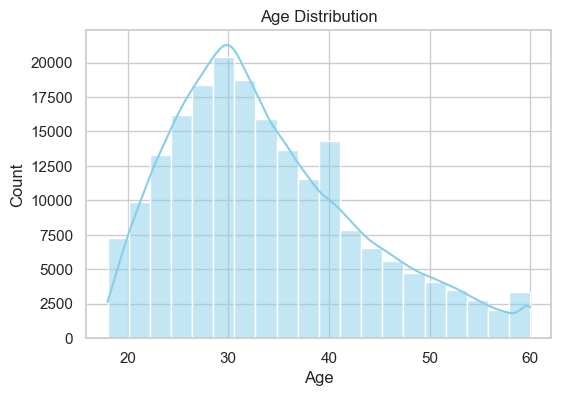

In [148]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()


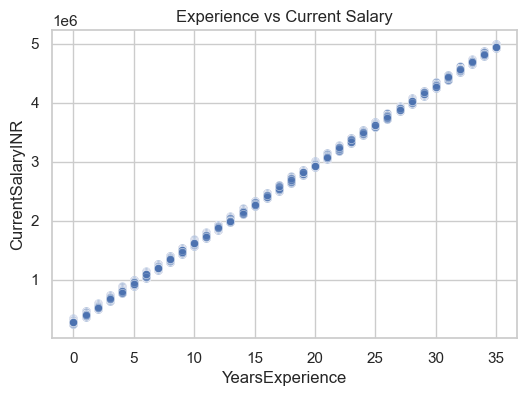

In [149]:
# Experience vs Current Salary
plt.figure(figsize=(6,4))
sns.scatterplot(x="YearsExperience", y="CurrentSalaryINR", data=df, alpha=0.6)
plt.title("Experience vs Current Salary")
plt.show()

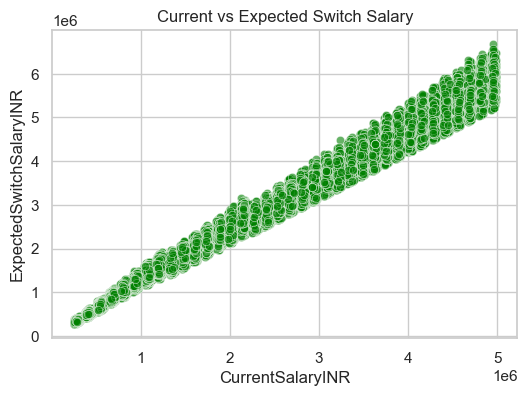

In [150]:
# Current Salary vs Expected Salary
plt.figure(figsize=(6,4))
sns.scatterplot(x="CurrentSalaryINR", y="ExpectedSwitchSalaryINR", data=df, alpha=0.6, color="green")
plt.title("Current vs Expected Switch Salary")
plt.show()

In [151]:
import numpy as np

# Add a fake 'Gender' column
np.random.seed(42)
df["Gender"] = np.random.choice(["Male", "Female"], size=len(df))

# Add a fake 'Education' column
df["Education"] = np.random.choice(["Bachelors", "Masters", "PhD"], size=len(df))

# Add a fake 'City' column
df["City"] = np.random.choice(["Delhi", "Mumbai", "Bangalore"], size=len(df))

df.head()

,Name,Age,YearsExperience,CurrentSalaryINR,ExpectedSwitchSalaryINR,Gender,Education,City
0,Imran Gupta,40,17,2553200,2969100,Male,Masters,Bangalore
1,Kiara Khanna,33,14,2115100,2901100,Female,Masters,Delhi
2,Olivia Rastogi,31,4,811800,980400,Male,PhD,Mumbai
3,Benjamin Chauhan,25,0,266300,376500,Male,Bachelors,Bangalore
4,Kabir Banerjee,37,9,1499600,1791800,Male,Bachelors,Mumbai


In [152]:
# One-Hot Encode categorical columns
df_encoded = pd.get_dummies(df, columns=["Gender", "Education", "City"], drop_first=True)

# Show first few rows
df_encoded.head()

,Name,Age,YearsExperience,CurrentSalaryINR,ExpectedSwitchSalaryINR,Gender_Male,Education_Masters,Education_PhD,City_Delhi,City_Mumbai
0,Imran Gupta,40,17,2553200,2969100,True,True,False,False,False
1,Kiara Khanna,33,14,2115100,2901100,False,True,False,True,False
2,Olivia Rastogi,31,4,811800,980400,True,False,True,False,True
3,Benjamin Chauhan,25,0,266300,376500,True,False,False,False,False
4,Kabir Banerjee,37,9,1499600,1791800,True,False,False,False,True


In [153]:
# Drop 'Name' column before splitting
if 'Name' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['Name'])

In [154]:
from sklearn.model_selection import train_test_split

# Features (X) - all columns except the target
X = df_encoded.drop("ExpectedSwitchSalaryINR", axis=1)

# Target (y) - the value we want to predict
y = df_encoded["ExpectedSwitchSalaryINR"]

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Shapes of the splits (just to confirm)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160000, 8)
X_test shape: (40000, 8)
y_train shape: (160000,)
y_test shape: (40000,)


In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the model
model = LinearRegression()

# Step 2: Train (fit) the model on training data
model.fit(X_train, y_train)

# Step 3: Make predictions on test data
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 17427029387.153027
R² Score: 0.990321300792824


Initial shapes:
 X_train: (160000, 8)
 y_train: (160000,)
 X_test : (40000, 8)
 y_test : (40000,)

Length check: 160000 160000

X_train dtypes count:
bool     5
int64    3
Name: count, dtype: int64
Object columns in X_train: []
Bool columns in X_train: ['Gender_Male', 'Education_Masters', 'Education_PhD', 'City_Delhi', 'City_Mumbai']

Converted boolean columns to integers (if any).

Missing value counts after coercion:
 X_train NaNs: 0
 X_test NaNs: 0
 y_train NaNs: 0
 y_test NaNs: 0

Imputed numeric NaNs using median.

Shapes after imputation (before scaling):
 X_train_imp: (160000, 8)
 y_train_num: (160000,)
 X_test_imp : (40000, 8)
 y_test_num : (40000,)
Features scaled (StandardScaler).

Model evaluation (Linear Regression):
 MSE: 17427029387.16715
 R2 : 0.9903213007928161


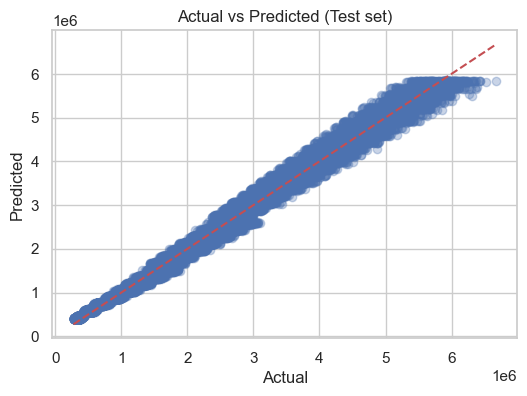

In [156]:
# --- Diagnostic + Fix cell ---
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# assume X_train, X_test, y_train, y_test already exist from your previous split
print("Initial shapes:")
print(" X_train:", getattr(X_train, "shape", None))
print(" y_train:", getattr(y_train, "shape", None))
print(" X_test :", getattr(X_test, "shape", None))
print(" y_test :", getattr(y_test, "shape", None))
print()

# quick shape alignment check
print("Length check:", len(X_train), len(y_train))
if len(X_train) != len(y_train):
    print("⚠️ Lengths mismatch between X_train and y_train. That will cause a ValueError.")
print()

# show dtypes and any object columns
print("X_train dtypes count:")
print(X_train.dtypes.value_counts())
obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()
bool_cols = X_train.select_dtypes(include=['bool']).columns.tolist()
print("Object columns in X_train:", obj_cols)
print("Bool columns in X_train:", bool_cols)
print()

# If Name column exists (text), drop it (it's useless as-is for model)
if 'Name' in X_train.columns:
    print("Dropping 'Name' column (text).")
    X_train = X_train.drop(columns=['Name'])
    X_test = X_test.drop(columns=['Name'])

# convert bools -> ints
for c in bool_cols:
    if c in X_train.columns:
        X_train[c] = X_train[c].astype(int)
        X_test[c] = X_test[c].astype(int)
print("Converted boolean columns to integers (if any).")

# Coerce any remaining object cols to numeric (will produce NaN for non-convertible)
for c in obj_cols:
    if c in X_train.columns:
        print(f"Coercing column {c} to numeric (non-convertible values -> NaN).")
        X_train[c] = pd.to_numeric(X_train[c], errors='coerce')
        X_test[c] = pd.to_numeric(X_test[c], errors='coerce')

# Show NaN counts
print("\nMissing value counts after coercion:")
print(" X_train NaNs:", X_train.isnull().sum().sum())
print(" X_test NaNs:", X_test.isnull().sum().sum())
print(" y_train NaNs:", y_train.isnull().sum())
print(" y_test NaNs:", y_test.isnull().sum())
print()

# Impute numeric NaNs with median
imp = SimpleImputer(strategy='median')
X_train_imp = pd.DataFrame(imp.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imp = pd.DataFrame(imp.transform(X_test), columns=X_test.columns, index=X_test.index)
print("Imputed numeric NaNs using median.")

# Ensure y is numeric and drop any training rows where y is NaN
y_train_num = pd.to_numeric(y_train, errors='coerce')
y_test_num = pd.to_numeric(y_test, errors='coerce')

if y_train_num.isnull().any():
    print("Warning: y_train contains NaNs. Dropping corresponding rows from training set.")
    mask = ~y_train_num.isnull()
    X_train_imp = X_train_imp.loc[mask]
    y_train_num = y_train_num.loc[mask]

# final shapes
print("\nShapes after imputation (before scaling):")
print(" X_train_imp:", X_train_imp.shape)
print(" y_train_num:", y_train_num.shape)
print(" X_test_imp :", X_test_imp.shape)
print(" y_test_num :", y_test_num.shape)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)
print("Features scaled (StandardScaler).")

# Fit simple Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train_num)
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test_num, y_pred)
r2 = r2_score(y_test_num, y_pred)
print("\nModel evaluation (Linear Regression):")
print(" MSE:", mse)
print(" R2 :", r2)

# Quick visual check (optional)
try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6,4))
    plt.scatter(y_test_num, y_pred, alpha=0.3)
    plt.plot([y_test_num.min(), y_test_num.max()], [y_test_num.min(), y_test_num.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted (Test set)")
    plt.show()
except Exception as e:
    print("Could not draw plot:", e)
